In [1]:
%load_ext autoreload
%autoreload 2

In [70]:
import ast
import xarray as xr
import matplotlib.pyplot as plt
from src.data_generator import *
from src.train import *
from src.utils import *
from src.clr import *
from scipy.signal import convolve2d, convolve

In [7]:
da = xr.open_dataarray('/data/stephan/WeatherBench/5.625deg/temperature/temperature_1979_5.625deg.nc')

In [116]:
mean = da.mean(('time', 'lat', 'lon')).load()
std = da.std(('time', 'lat', 'lon')).load()

In [43]:
da_norm = (da - da.mean(('time', 'lat', 'lon'))) / da.std(('time', 'lat', 'lon'))

In [44]:
da_norm_local = (da - da.mean(('time'))) / da.std(('time'))

In [100]:
def plot_mean_std(da):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    da.sel(level=850).mean('time').plot(ax=ax1)
    da.sel(level=850).std('time').plot(ax=ax2)

In [66]:
def pad_periodic(arr, p):
    arr = np.pad(arr, ((0, 0), (0, 0), (p, p)), mode='wrap')
    arr = np.pad(arr, ((0, 0), (p, p), (0, 0)), mode='edge')
    return arr

In [141]:
from scipy.ndimage import gaussian_filter
def las(da, k, gauss_std=None):
    p = (k - 1) // 2
    arr = pad_periodic(da, p)
    arr = convolve(arr, np.ones((1, k, k))/(k**2), mode='valid')
    if gauss_std is not None:arr = np.array([gaussian_filter(a, gauss_std) for a in arr])
    da[:] = arr
    return da

In [142]:
mean_las = las(da.mean('time'), 7)
std_las = las(da.std('time'), 7)

In [143]:
mean_las

<xarray.DataArray 't' (level: 13, lat: 32, lon: 64)>
array([[[208.93147, 209.00485, 209.08029, ..., 208.73724, 208.7964 ,
         208.8614 ],
        [209.60223, 209.7184 , 209.83472, ..., 209.28485, 209.38283,
         209.48946],
        [210.59995, 210.75926, 210.91872, ..., 210.15683, 210.29501,
         210.44324],
        ...,
        [217.23996, 217.12556, 217.01454, ..., 217.60765, 217.48045,
         217.3587 ],
        [217.3789 , 217.27545, 217.17682, ..., 217.72137, 217.60272,
         217.48868],
        [217.51755, 217.43271, 217.35426, ..., 217.81015, 217.70795,
         217.60992]],

       [[211.23842, 211.27492, 211.31401, ..., 211.15044, 211.1751 ,
         211.20467],
        [211.80782, 211.87451, 211.9437 , ..., 211.63774, 211.68733,
         211.74446],
        [212.71489, 212.81584, 212.91841, ..., 212.44585, 212.52751,
         212.61778],
        ...,
        [219.91219, 219.79016, 219.67023, ..., 220.2608 , 220.14932,
         220.0327 ],
        [220.13976, 220.03734, 219.93758, ..., 220.43558, 220.34064,
         220.24149],
        [220.27669, 220.20262, 220.13121, ..., 220.5004 , 220.42596,
         220.35126]],

       [[211.87741, 211.89476, 211.91206, ..., 211.82674, 211.84267,
         211.86   ],
        [212.52423, 212.57327, 212.6198 , ..., 212.38634, 212.42819,
         212.475  ],
        [213.49048, 213.57115, 213.64873, ..., 213.26276, 213.33255,
         213.40971],
        ...,
        [221.14206, 221.06549, 220.98592, ..., 221.32991, 221.2772 ,
         221.21333],
        [221.29713, 221.24313, 221.18744, ..., 221.43674, 221.39516,
         221.34853],
        [221.35036, 221.32169, 221.29312, ..., 221.43254, 221.40555,
         221.37881]],

       ...,

       [[245.9659 , 245.73592, 245.56844, ..., 246.78783, 246.51915,
         246.24883],
        [248.7015 , 248.4809 , 248.31079, ..., 249.5474 , 249.25331,
         248.97816],
        [251.84172, 251.62271, 251.43967, ..., 252.73265, 252.40918,
         252.12003],
        ...,
        [263.99432, 264.22525, 264.31696, ..., 262.93042, 263.3356 ,
         263.69684],
        [262.0078 , 262.2229 , 262.31363, ..., 261.03427, 261.40305,
         261.73343],
        [260.37482, 260.5301 , 260.59998, ..., 259.54132, 259.85397,
         260.13348]],

       [[249.64516, 249.44322, 249.30403, ..., 250.08401, 250.01123,
         249.85953],
        [252.09586, 251.92998, 251.80821, ..., 252.44545, 252.38893,
         252.2703 ],
        [255.00723, 254.8634 , 254.75684, ..., 255.3346 , 255.27142,
         255.163  ],
        ...,
        [265.87   , 266.1489 , 266.26733, ..., 264.77213, 265.15182,
         265.5419 ],
        [263.42532, 263.70776, 263.84344, ..., 262.40546, 262.74414,
         263.1102 ],
        [261.3333 , 261.57242, 261.69736, ..., 260.4504 , 260.72784,
         261.0424 ]],

       [[253.19583, 252.98222, 252.8161 , ..., 253.49402, 253.48848,
         253.38324],
        [255.53845, 255.38364, 255.25517, ..., 255.65994, 255.70218,
         255.66101],
        [258.458  , 258.33496, 258.23947, ..., 258.5369 , 258.57867,
         258.55865],
        ...,
        [268.03848, 268.2996 , 268.3702 , ..., 267.188  , 267.5052 ,
         267.76462],
        [265.00546, 265.30197, 265.4226 , ..., 264.14566, 264.43643,
         264.7072 ],
        [262.32544, 262.60687, 262.7372 , ..., 261.59473, 261.80786,
         262.05124]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * level    (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000

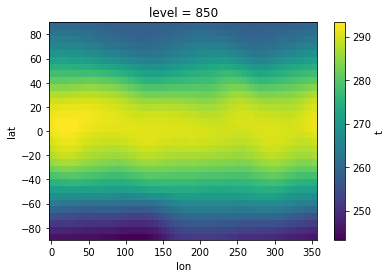

In [144]:
mean_las.sel(level=850).plot()

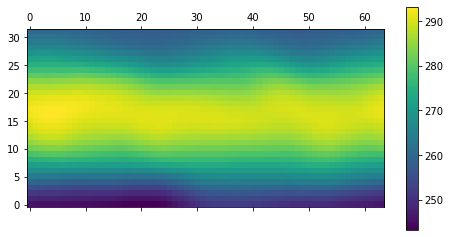

In [140]:
plt.matshow(mean_las[-3], origin='lower'); plt.colorbar()

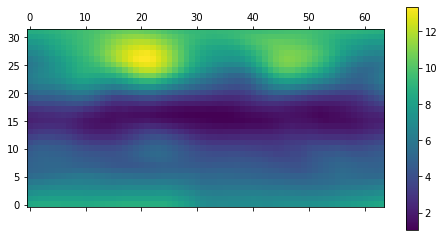

In [122]:
plt.matshow(std_las[-3], origin='lower'); plt.colorbar()

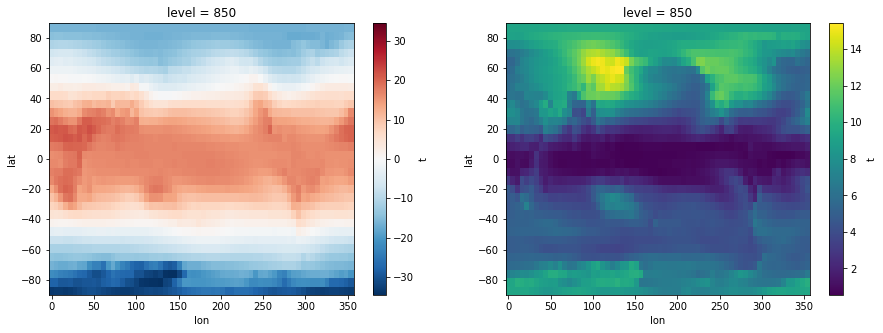

In [124]:
plot_mean_std(da - mean)

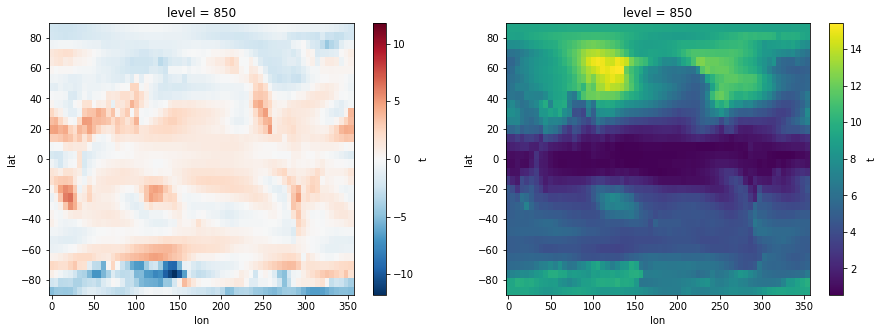

In [125]:
plot_mean_std(da - mean_las)

In [126]:
da_norm_las = (da - mean_las) / std_las

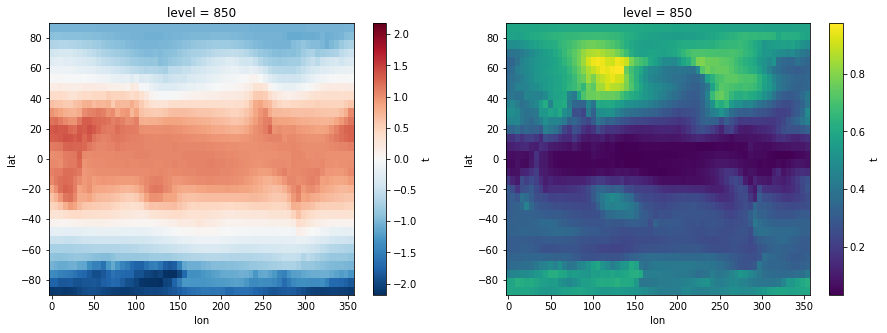

In [127]:
plot_mean_std(da_norm)

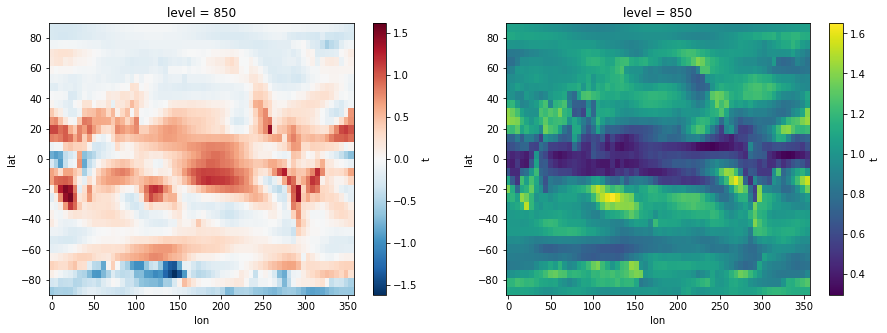

In [128]:
plot_mean_std(da_norm_las)

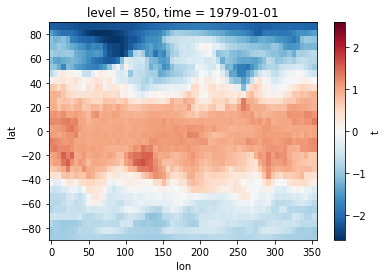

In [131]:
da_norm.isel(time=0).sel(level=850).plot();

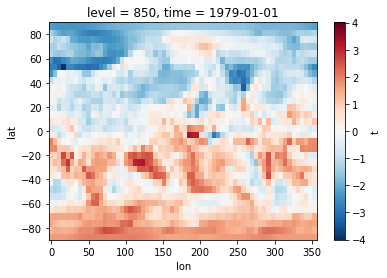

In [132]:
da_norm_las.isel(time=0).sel(level=850).plot();

## Debug

In [318]:
from src.utils import *

In [319]:
args = load_args('../nn_configs/B/116-resnet_d3_las.yml')

In [320]:
ds = xr.merge(
    [xr.open_mfdataset(f'{args["datadir"]}/{var}/*.nc', combine='by_coords')
     for var in args["var_dict"].keys()],
    fill_value=0  # For the 'tisr' NaNs
)

In [322]:
ds_train = ds.sel(time=slice('2015', '2015'))

In [357]:
ds_train = ds_train.isel(time=slice(0, 100))

In [390]:
dg_train = DataGenerator(
    ds_train, args['var_dict'], args['lead_time'], batch_size=args['batch_size'], output_vars=args['output_vars'],
    data_subsample=args['data_subsample'], norm_subsample=10, nt_in=args['nt_in'], dt_in=args['dt_in'],
    las_kernel=7, las_gauss_std=None, verbose=1
)

DG start 15:02:59.014416
DG normalize 15:02:59.054413
DG load 15:03:06.096585
Loading data into RAM
DG done 15:03:07.865533


In [364]:
dg_train.data

<xarray.DataArray 'z' (time: 50, lat: 32, lon: 64, level: 38)>
array([[[[ 7.08091570e-01,  4.50928554e-02, -4.63198575e-01, ...,
           1.44426201e+00,  2.57085561e+00, -1.67874412e+00],
         [ 7.85025881e-01,  3.15154714e-02, -5.25325518e-01, ...,
           1.44426201e+00,  2.63684811e+00, -1.67874412e+00],
         [ 7.72713089e-01, -3.79411754e-02, -5.97332711e-01, ...,
           1.44426201e+00,  2.70122081e+00, -1.67874412e+00],
         ...,
         [ 2.04543126e-01, -2.89012017e-01, -4.83455803e-01, ...,
           1.44426201e+00,  2.40688572e+00, -1.67874412e+00],
         [ 4.00258504e-01, -1.07806969e-01, -4.48497839e-01, ...,
           1.44426201e+00,  2.47378905e+00, -1.67874412e+00],
         [ 5.74699343e-01,  3.08439263e-03, -4.38824169e-01, ...,
           1.44426201e+00,  2.52247395e+00, -1.67874412e+00]],

        [[ 2.32598059e+00,  1.58256230e+00,  6.04904981e-01, ...,
           1.44426201e+00,  2.06275586e+00, -1.57043805e+00],
         [ 2.33024631e+00,  1.75099796e+00,  8.40673994e-01, ...,
           1.44426201e+00,  2.33441714e+00, -1.57043805e+00],
         [ 2.20143911e+00,  1.79508649e+00,  1.03331584e+00, ...,
           1.44426201e+00,  2.47945850e+00, -1.57043805e+00],
         ...,
         [ 1.84894698e+00,  6.11133940e-01,  1.23592745e-01, ...,
           1.44426201e+00,  1.50808802e+00, -1.57043805e+00],
         [ 2.05651395e+00,  9.62554139e-01,  2.65135349e-01, ...,
           1.44426201e+00,  1.76416741e+00, -1.57043805e+00],
         [ 2.17917523e+00,  1.30234846e+00,  4.13745157e-01, ...,
           1.44426201e+00,  1.87833927e+00, -1.57043805e+00]],

        [[ 1.39032571e+00, -7.35540838e-01, -7.88550283e-01, ...,
           1.44426201e+00,  2.80071523e+00, -1.46213197e+00],
         [ 1.01615235e+00, -9.32934043e-01, -4.51387563e-01, ...,
           1.44426201e+00,  3.12389527e+00, -1.46213197e+00],
         [ 5.21570218e-01, -1.10182919e+00, -8.39508529e-02, ...,
           1.44426201e+00,  3.37895707e+00, -1.46213197e+00],
         ...,
         [ 1.96303644e+00, -5.65326369e-01, -5.22278080e-01, ...,
           1.44426201e+00,  8.59694584e-01, -1.46213197e+00],
         [ 1.85893803e+00, -5.66594600e-01, -8.17775444e-01, ...,
           1.44426201e+00,  2.03308297e+00, -1.46213197e+00],
         [ 1.63673276e+00, -6.29675489e-01, -9.56229114e-01, ...,
           1.44426201e+00,  2.49159806e+00, -1.46213197e+00]],

        ...,

        [[-1.30732742e+00,  4.55227460e-01, -5.88027865e-01, ...,
          -7.34369322e-01, -4.41508818e-01,  1.46213197e+00],
         [-1.43896408e+00,  5.17753937e-01, -4.87078671e-01, ...,
          -7.34369322e-01, -4.40901513e-01,  1.46213197e+00],
         [-1.61173514e+00,  5.11197246e-01, -4.50562892e-01, ...,
          -7.34369322e-01, -4.41913690e-01,  1.46213197e+00],
         ...,
         [-8.19369150e-01,  3.00211097e-01, -8.26478328e-01, ...,
          -7.34369299e-01, -4.35841996e-01,  1.46213197e+00],
         [-1.01700078e+00,  3.22177693e-01, -8.61974450e-01, ...,
          -7.34369322e-01, -4.41205164e-01,  1.46213197e+00],
         [-1.16926865e+00,  3.78448333e-01, -7.54491103e-01, ...,
          -7.34369322e-01, -4.41103999e-01,  1.46213197e+00]],

        [[-2.72187570e+00, -7.54957584e-01, -8.69289766e-01, ...,
          -7.34369322e-01, -4.41306382e-01,  1.57043805e+00],
         [-2.78780561e+00, -6.09149473e-01, -8.06028945e-01, ...,
          -7.34369322e-01, -4.40699074e-01,  1.57043805e+00],
         [-2.79072029e+00, -4.94479002e-01, -7.45077844e-01, ...,
          -7.34369322e-01, -4.42419778e-01,  1.57043805e+00],
         ...,
         [-2.20223679e+00, -1.23927627e+00, -1.06687031e+00, ...,
           1.06439006e+00, -2.83015586e-01,  1.57043805e+00],
         [-2.42321348e+00, -1.10831473e+00, -1.02288829e+00, ...,
          -2.99333107e-01, -3.98481756e-01,  1.57043805e+00],
         [-2.60390955e+00, -9.37245490e-01, -9.48269230e-01, ...,
          -7.34369322e-01, -4.43735187e-01,  1.57043805e+00]],

   

In [387]:
dg_train.std[:] = np.maximum(dg_train.std, 1e-6)

In [373]:
X, y = dg_train[0]

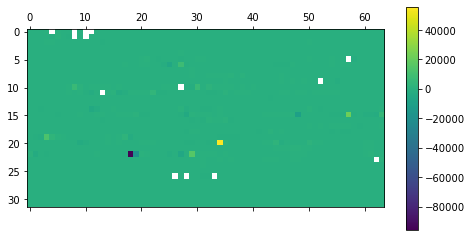

In [376]:
plt.matshow(X[0, ..., -10])
plt.colorbar()

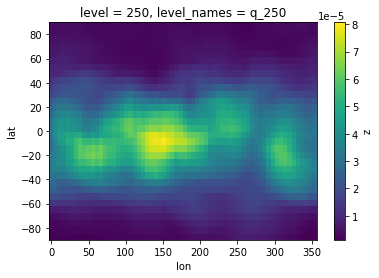

In [389]:
dg_train.std.isel(level=-9).plot()

(1e-07, 1000.0)

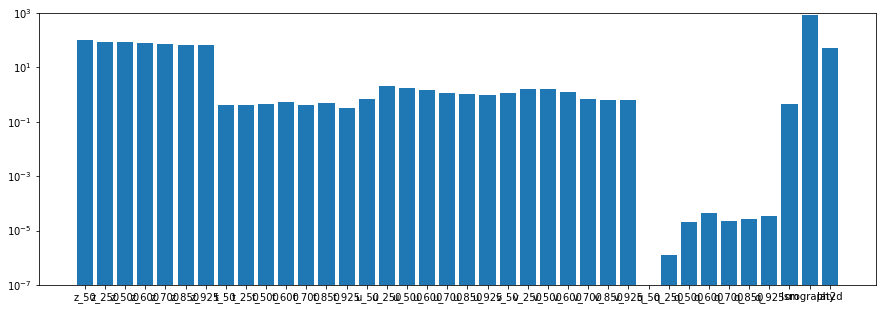

In [386]:
fig = plt.figure(figsize=(15, 5))
plt.bar(dg_train.std.level_names, dg_train.std.min(('lat', 'lon')))
plt.yscale('log')
plt.ylim(1e-7, 1e3)

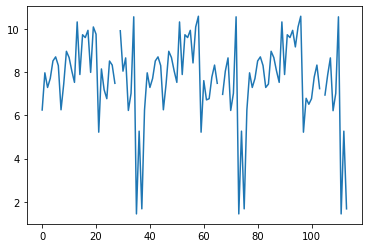

In [382]:
plt.plot(np.max(np.abs(X), (0, 1, 2)))

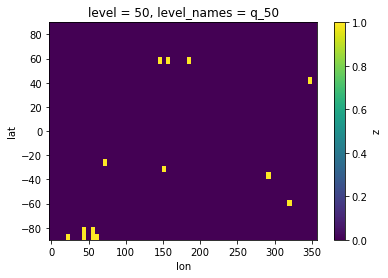

In [377]:
(dg_train.std.isel(level=-10) == 0).plot()

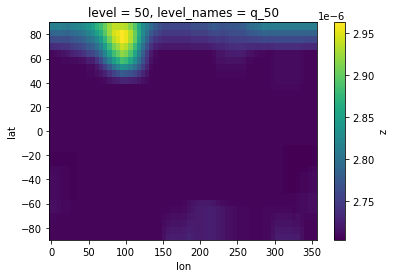

In [372]:
dg_train.mean.isel(level=-10).plot()

In [353]:
dg_train.std[..., 37]

<xarray.DataArray 'z' (lat: 32, lon: 64)>
array([[51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619],
       [51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619],
       [51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619],
       ...,
       [51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619],
       [51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619],
       [51.93614619, 51.93614619, 51.93614619, ..., 51.93614619,
        51.93614619, 51.93614619]])
Coordinates:
  * lon          (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat          (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
    level        int64 1
    level_names  <U9 'lat2d'

In [355]:
X.shape

(32, 32, 64, 114)

In [356]:
X[..., -1]

array([[[-1.6787441, -1.6787441, -1.6787441, ..., -1.6787441,
         -1.6787441, -1.6787441],
        [-1.570438 , -1.570438 , -1.570438 , ..., -1.570438 ,
         -1.570438 , -1.570438 ],
        [-1.462132 , -1.462132 , -1.462132 , ..., -1.462132 ,
         -1.462132 , -1.462132 ],
        ...,
        [ 1.462132 ,  1.462132 ,  1.462132 , ...,  1.462132 ,
          1.462132 ,  1.462132 ],
        [ 1.570438 ,  1.570438 ,  1.570438 , ...,  1.570438 ,
          1.570438 ,  1.570438 ],
        [ 1.6787441,  1.6787441,  1.6787441, ...,  1.6787441,
          1.6787441,  1.6787441]],

       [[-1.6787441, -1.6787441, -1.6787441, ..., -1.6787441,
         -1.6787441, -1.6787441],
        [-1.570438 , -1.570438 , -1.570438 , ..., -1.570438 ,
         -1.570438 , -1.570438 ],
        [-1.462132 , -1.462132 , -1.462132 , ..., -1.462132 ,
         -1.462132 , -1.462132 ],
        ...,
        [ 1.462132 ,  1.462132 ,  1.462132 , ...,  1.462132 ,
          1.462132 ,  1.462132 ],
        [ 1.

In [263]:
ds_train.load()

<xarray.Dataset>
Dimensions:    (lat: 32, level: 13, lon: 64, time: 8760)
Coordinates:
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * level      (level) int32 50 100 150 200 250 300 400 500 600 700 850 925 1000
  * lat        (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00
Data variables:
    z          (time, level, lat, lon) float32 201331.0 201327.72 ... -1947.4286
    t          (time, level, lat, lon) float32 236.24202 236.07773 ... 262.46506
    u          (time, level, lat, lon) float32 2.5355492 2.5238724 ... -8.132125
    v          (time, level, lat, lon) float32 0.30551666 ... -6.8004627
    q          (time, level, lat, lon) float32 2.7073547e-06 ... 0.0009749285
    orography  (lat, lon) float32 2590.105 2646.85 ... -0.49164355 -0.23066132
    lsm        (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    slt        (lat, lon) float32 1.0000153 1.0000153 1.0000153 ... 0.0 0.0 0.0
    lat2d      (lat, lon) float64 -87.19 -87.19 -87.19 ... 87.19 87.19 87.19
    lon2d      (lat, lon) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4

In [238]:
dg_train = DataGenerator(
    ds_train, args['var_dict'], args['lead_time'], batch_size=args['batch_size'], output_vars=args['output_vars'],
    data_subsample=args['data_subsample'], norm_subsample=100, nt_in=args['nt_in'], dt_in=args['dt_in'],
    las_kernel=7, las_gauss_std=None, mean=0, std=1
)

In [265]:
raw = dg_train.data.copy().load()

In [276]:
mean_local = raw.mean('time')
std_local = raw.std('time')

In [299]:
mean_local

<xarray.DataArray 'z' (lat: 32, lon: 64, level: 38)>
array([[[ 1.87460661e+05,  9.22584024e+04,  4.86245623e+04, ...,
          1.00000000e+00,  2.59010498e+03, -8.71875000e+01],
        [ 1.87444277e+05,  9.22530966e+04,  4.86340202e+04, ...,
          1.00000000e+00,  2.64685010e+03, -8.71875000e+01],
        [ 1.87428895e+05,  9.22468271e+04,  4.86426105e+04, ...,
          1.00000000e+00,  2.70220239e+03, -8.71875000e+01],
        ...,
        [ 1.87516974e+05,  9.22711215e+04,  4.85949156e+04, ...,
          1.00000000e+00,  2.44911182e+03, -8.71875000e+01],
        [ 1.87496978e+05,  9.22673056e+04,  4.86047323e+04, ...,
          1.00000000e+00,  2.50664014e+03, -8.71875000e+01],
        [ 1.87478381e+05,  9.22632893e+04,  4.86149723e+04, ...,
          1.00000000e+00,  2.54850293e+03, -8.71875000e+01]],

       [[ 1.87637681e+05,  9.24347498e+04,  4.86807693e+04, ...,
          1.00000000e+00,  2.15320410e+03, -8.15625000e+01],
        [ 1.87592099e+05,  9.24200769e+04,  4.87121318e+04, ...,
          1.00000000e+00,  2.38679810e+03, -8.15625000e+01],
        [ 1.87551665e+05,  9.24062086e+04,  4.87439619e+04, ...,
          1.00000000e+00,  2.51151514e+03, -8.15625000e+01],
        ...,
        [ 1.87803874e+05,  9.24849682e+04,  4.86110682e+04, ...,
          1.00000000e+00,  1.67626062e+03, -8.15625000e+01],
        [ 1.87743918e+05,  9.24672458e+04,  4.86297640e+04, ...,
          1.00000000e+00,  1.89645618e+03, -8.15625000e+01],
        [ 1.87688948e+05,  9.24507183e+04,  4.86532455e+04, ...,
          1.00000000e+00,  1.99462939e+03, -8.15625000e+01]],

       [[ 1.88258045e+05,  9.26854589e+04,  4.87738367e+04, ...,
          1.00000000e+00,  2.78775488e+03, -7.59375000e+01],
        [ 1.88190987e+05,  9.26635153e+04,  4.88166161e+04, ...,
          1.00000000e+00,  3.06564844e+03, -7.59375000e+01],
        [ 1.88136272e+05,  9.26379141e+04,  4.88522343e+04, ...,
          1.00000000e+00,  3.28496899e+03, -7.59375000e+01],
        ...,
        [ 1.88522694e+05,  9.27762763e+04,  4.86953813e+04, ...,
          1.00000000e+00,  1.11872510e+03, -7.59375000e+01],
        [ 1.88426337e+05,  9.27384430e+04,  4.87055415e+04, ...,
          1.00000000e+00,  2.12768921e+03, -7.59375000e+01],
        [ 1.88337296e+05,  9.27083277e+04,  4.87331131e+04, ...,
          1.00000000e+00,  2.52195361e+03, -7.59375000e+01]],

       ...,

       [[ 1.98133235e+05,  9.73525144e+04,  5.18870955e+04, ...,
          0.00000000e+00, -1.43596753e-01,  7.59375000e+01],
        [ 1.98131342e+05,  9.73972573e+04,  5.19150857e+04, ...,
          0.00000000e+00,  3.78607571e-01,  7.59375000e+01],
        [ 1.98107808e+05,  9.74221685e+04,  5.19394048e+04, ...,
          0.00000000e+00, -4.91735637e-01,  7.59375000e+01],
        ...,
        [ 1.98028703e+05,  9.71382882e+04,  5.18136225e+04, ...,
          1.02369464e-08,  4.72914553e+00,  7.59375000e+01],
        [ 1.98079491e+05,  9.72222786e+04,  5.18397139e+04, ...,
          0.00000000e+00,  1.17506355e-01,  7.59375000e+01],
        [ 1.98115125e+05,  9.72932022e+04,  5.18628111e+04, ...,
          0.00000000e+00,  2.04495415e-01,  7.59375000e+01]],

       [[ 1.97212406e+05,  9.66329489e+04,  5.15150751e+04, ...,
          0.00000000e+00,  3.04719880e-02,  8.15625000e+01],
        [ 1.97198980e+05,  9.66567869e+04,  5.15256266e+04, ...,
          0.00000000e+00,  5.52678883e-01,  8.15625000e+01],
        [ 1.97179377e+05,  9.66738405e+04,  5.15342139e+04, ...,
          0.00000000e+00, -9.26906586e-01,  8.15625000e+01],
        ...,
        [ 1.97212979e+05,  9.65099590e+04,  5.14561939e+04, ...,
          8.25637341e-01,  1.36140335e+02,  8.15625000e+01],
        [ 1.97218189e+05,  9.65598638e+04,  5.14800335e+04, ...,
          1.99683264e-01,  3.68541794e+01,  8.15625000e+01],
        [ 1.97218018e+05,  9.66000681e+04,  5.14995290e+04, ...,
          0.00000000e+00, -2.05799007e+00,  8.15625000e+01]],

       [[ 1.96749443e+05,  9.61190089e+04,  5.11952958e+04, ...,
          0.00

In [317]:
k=7
mean_las = compute_las(raw.mean('time'), k, 3)
std_las = compute_las(raw.std('time'), k, 3)
da_las = (raw - mean_las) / std_las

ValueError: could not broadcast input array from shape (1,32,2432) into shape (32,64,38)

In [261]:
da_lat = (raw - raw.mean(('time', 'lon'))) / raw.std(('time', 'lon'))

In [271]:
da_lat2 = (raw - mean_las) / raw.std(('time', 'lon'))

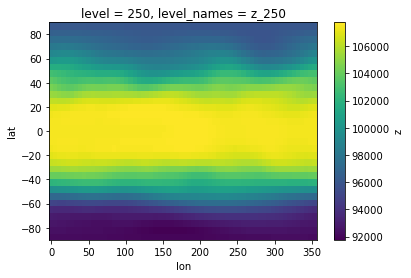

In [288]:
mean_local.isel(level=1).plot()

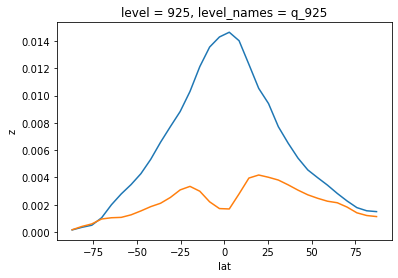

In [267]:
raw.mean(('time', 'lon')).isel(level=34).plot()
raw.std(('time', 'lon')).isel(level=34).plot()

In [253]:
da_norm = (raw - raw.mean(('time', 'lat', 'lon'))) / raw.std(('time', 'lat', 'lon'))

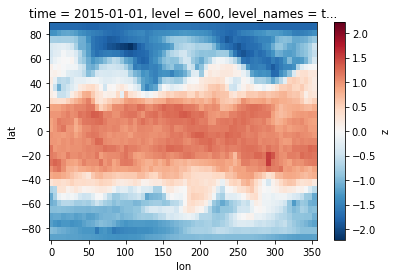

In [309]:
da_norm.isel(time=0, level=10).plot()

In [ ]:
da_las.isel(time=0, level=10).plot()

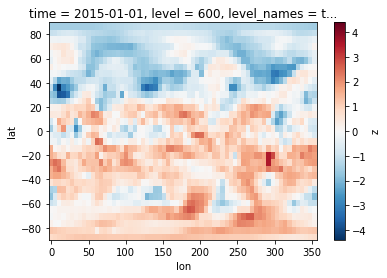

In [312]:
da_las.isel(time=0, level=10).plot()

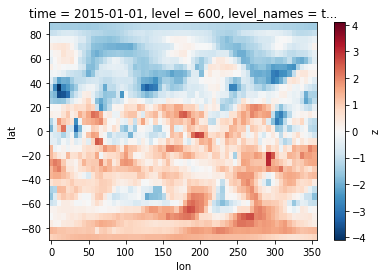

In [310]:
da_las.isel(time=0, level=10).plot()

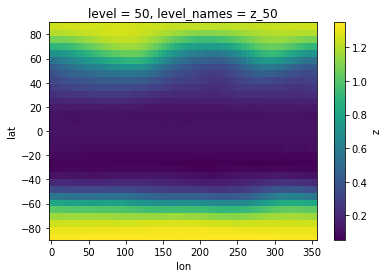

In [260]:
da_norm.std('time').isel(level=0).plot()

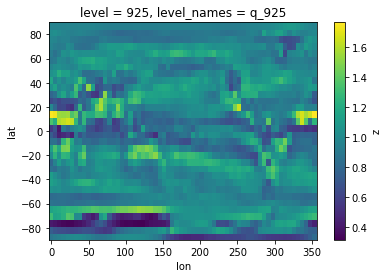

In [303]:
da_las.std('time').isel(level=34).plot()

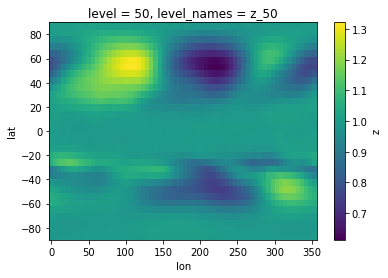

In [272]:
da_lat2.std('time').isel(level=0).plot()

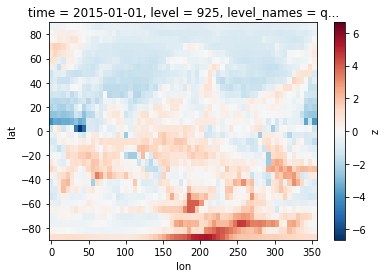

In [269]:
da_lat.isel(time=0, level=34).plot()

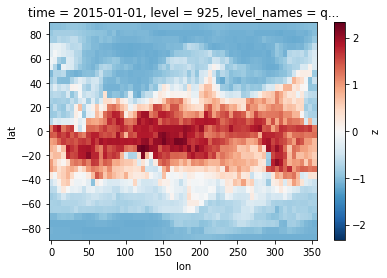

In [270]:
da_norm.isel(time=0, level=34).plot()

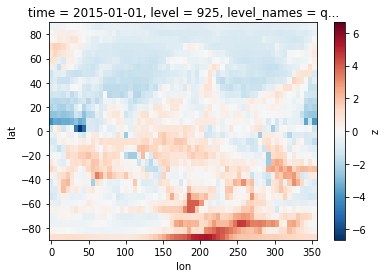

In [262]:
da_lat.isel(time=0, level=34).plot()

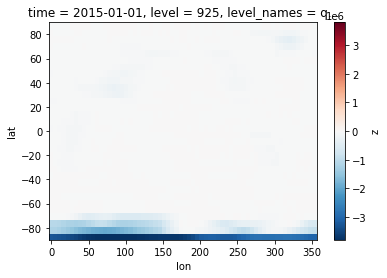

In [273]:
da_lat2.isel(time=0, level=34).plot()

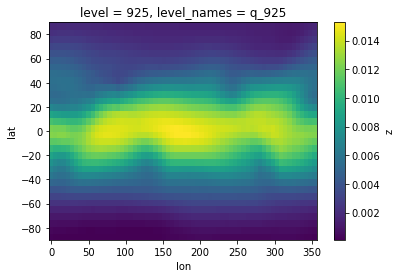

In [304]:
mean_las.isel(level=34).plot()

In [225]:
ind = np.unravel_index(np.argmin(dg_train.data, axis=None), dg_train.data.shape)

In [226]:
ms = dg_train.mean / dg_train.std

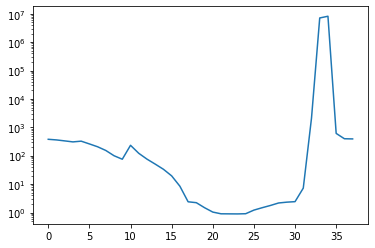

In [227]:
plt.plot(ms.max(('lat', 'lon')).values)
plt.yscale('log')

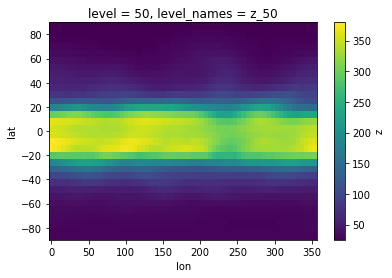

In [228]:
ms.isel(level=0).plot()

In [229]:
dg_train.std.isel(level=34).min()

<xarray.DataArray 'z' ()>
array(5.72782424e-05)
Coordinates:
    level        int64 925
    level_names  <U9 'q_925'

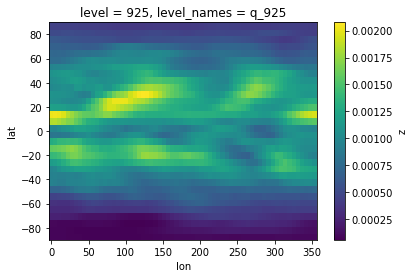

In [230]:
dg_train.std.isel(level=34).plot()

In [231]:
dg_train.data[2228, :, :, 34]

<xarray.DataArray 'z' (lat: 32, lon: 64)>
array([[-4364745.7974047 , -4381839.06215488, -4443444.01206885, ...,
        -3375413.72801151, -3444068.55195806, -3470133.88525897],
       [-3912424.75449149, -3968183.64550429, -4142089.64061564, ...,
        -1603499.34657478, -1787692.40659231, -1819517.92355242],
       [-4933280.85244467, -4983725.40114205, -5141061.96796278, ...,
         -981844.23274889, -1191613.06345682, -1282285.41908565],
       ...,
       [  -17516.57947624,   -17560.47232122,   -17881.34159845, ...,
         -247915.20285062,  -139054.46976136,   -81990.30787382],
       [  -22982.47474526,   -22947.82025298,   -22784.30725127, ...,
         -111319.84581827,   -83655.23534042,   -69749.71354875],
       [  -28086.66351142,   -28097.31119741,   -28038.72703926, ...,
          -29421.54164732,   -29835.74947628,   -29945.17469064]])
Coordinates:
  * lon          (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
    time         datetime64[ns] 2015-07-05T16:00:00
  * lat          (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
    level        int64 925
    level_names  <U9 'q_925'

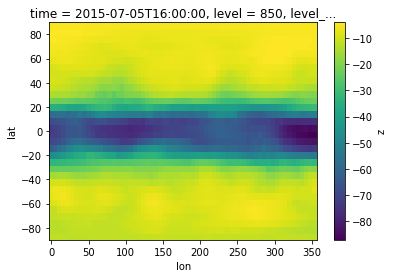

In [234]:
dg_train.data[2228, :, :, 5].plot()

In [196]:
ind

(2228, 0, 15, 34)

In [192]:
dg_train.data.min(), dg_train.data.max()

(<xarray.DataArray 'z' ()>
 array(-8771802.51819826),
 <xarray.DataArray 'z' ()>
 array(45725.8495244))

In [163]:
m.close(); s.close()

In [173]:
d = xr.open_dataarray('/home/rasp/tmp/tmp_data.nc')
m = xr.open_dataarray('/home/rasp/data/myWeatherBench/predictions/saved_models//116-resnet_d3_las_mean.nc')
s = xr.open_dataarray('/home/rasp/data/myWeatherBench/predictions/saved_models//116-resnet_d3_las_std.nc')

In [174]:
dn = (d - m) / s

In [179]:
dn

<xarray.DataArray 'z' (time: 8760, lat: 32, lon: 64, level: 38)>
array([[[[ 82.42142599,  20.43292323,  -3.25566882, ..., -21.95120998,
          -24.96468798, -28.3661644 ],
         [ 82.4922378 ,  20.44363285,  -3.24587848, ..., -21.95341524,
          -24.93463753, -28.38251753],
         [ 82.58458265,  20.45838411,  -3.23845658, ..., -21.95627589,
          -24.90649887, -28.40373543],
         ...,
         [ 81.78087539,  20.29222721,  -3.25184624, ..., -21.94318054,
          -24.96057527, -28.16811985],
         [ 81.90441514,  20.32639508,  -3.24924078, ..., -21.94378435,
          -24.94303554, -28.21310133],
         [ 82.00363459,  20.35436767,  -3.24555028, ..., -21.94443428,
          -24.93183132, -28.24840322]],

        [[ 86.10201478,  21.36035112,  -3.57063561, ..., -22.36610183,
          -26.05009693, -29.49861228],
         [ 86.04413084,  21.35810863,  -3.51242285, ..., -22.38266963,
          -25.89371703, -29.48498887],
         [ 86.00921554,  21.35855949,  -3.45927859, ..., -22.40239635,
          -25.81384072, -29.47816439],
         ...,
         [ 85.41409851,  21.14383158,  -3.67869438, ..., -22.21583711,
          -26.17444087, -29.2169698 ],
         [ 85.82231706,  21.26405892,  -3.65951572, ..., -22.24311066,
          -26.08355521, -29.34246044],
         [ 86.06694785,  21.34075827,  -3.62719536, ..., -22.2656658 ,
          -26.05312975, -29.41890588]],

        [[ 88.63334952,  21.6245656 ,  -3.59019709, ..., -23.48218516,
          -27.00884813, -30.77904946],
         [ 88.71412194,  21.70869026,  -3.46700368, ..., -23.53872242,
          -26.84837345, -30.81793707],
         [ 88.88536267,  21.81936828,  -3.37772838, ..., -23.60661142,
          -26.76578169, -30.89166703],
         ...,
         [ 91.3672369 ,  22.26504556,  -4.07773868, ..., -23.03406925,
          -28.48554994, -31.50469867],
         [ 91.51845797,  22.32608326,  -3.99593902, ..., -23.12625879,
          -27.88333617, -31.5991103 ],
         [ 91.32093646,  22.32420742,  -3.87800241, ..., -23.20479635,
          -27.65551935, -31.58173485]],

        ...,

        [[ 66.22707052,  16.05914905,  -4.08483305, ..., -26.30786613,
          -27.30005129, -27.1362582 ],
         [ 65.73588033,  15.82325474,  -4.17384786, ..., -26.22503149,
          -27.17633129, -27.02257441],
         [ 65.07902056,  15.56185628,  -4.25128715, ..., -26.10039424,
          -26.97930651, -26.82935241],
         ...,
         [ 68.04669338,  16.97684706,  -3.97404396, ..., -26.36207608,
          -27.54219576, -27.49640268],
         [ 67.42698874,  16.68627603,  -4.01696904, ..., -26.3622832 ,
          -27.48312625, -27.3594884 ],
         [ 66.91670838,  16.4362947 ,  -4.06248388, ..., -26.35648972,
          -27.42669564, -27.25089204]],

        [[ 61.138852  ,  14.94006575,  -3.62805831, ..., -23.79141762,
          -25.02745212, -24.90088739],
         [ 60.7054976 ,  14.81419128,  -3.61417771, ..., -23.73437145,
          -24.90973009, -24.77287193],
         [ 60.18178093,  14.66571317,  -3.59743707, ..., -23.66090291,
          -24.76444963, -24.60841946],
         ...,
         [ 64.18416339,  15.82039476,  -3.87803708, ..., -24.11614923,
          -25.74565461, -25.89379463],
         [ 63.55756698,  15.62331437,  -3.82555675, ..., -24.05721255,
          -25.66833847, -25.70580008],
         [ 63.02551295,  15.45520906,  -3.77422661, ..., -24.00970812,
          -25.57643892, -25.54960003]],

        [[ 61.28987059,  15.25502823,  -3.48779317, ..., -23.32902483,
          -25.02120212, -24.88149407],
         [ 61.07731528,  15.19341997,  -3.46639006, ..., -23.30986108,
          -24.9787803 , -24.81903964],
         [ 60.82558709,  15.12305045,  -3.44080151, ..., -23.28748209,
          -24.92852351, -24.7440571 ],
         ...,
         [ 62.90448443,  15.72068542,  -3.61095756, ..., -23.51512633,
          -25.38239746, -25.40158798],
         [ 62.58144727,  15.62164144,  -3.58410951, ..., -23.47766121,
          -25.31

In [185]:
(s.isel(level=-4) / s.isel(level=-4).mean()).min()

<xarray.DataArray 'z' ()>
array(0.05818445)
Coordinates:
    level        int64 925
    level_names  <U5 'q_925'

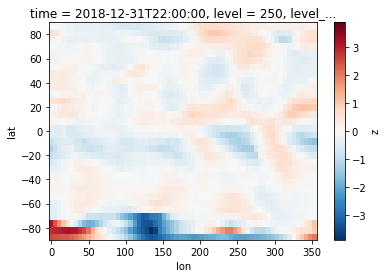

In [186]:
dn.isel(level=-9, time=-1).plot()

In [176]:
for i in range(len(s.level)):
    print(dn.isel(level=i).max())

<xarray.DataArray 'z' ()>
array(1106.06537776)
Coordinates:
    level        int64 50
    level_names  object 'z_50'
<xarray.DataArray 'z' ()>
array(300.2448954)
Coordinates:
    level        int64 250
    level_names  object 'z_250'
<xarray.DataArray 'z' ()>
array(-1.43602798)
Coordinates:
    level        int64 500
    level_names  object 'z_500'
<xarray.DataArray 'z' ()>
array(-6.33748739)
Coordinates:
    level        int64 600
    level_names  object 'z_600'
<xarray.DataArray 'z' ()>
array(-0.93006734)
Coordinates:
    level        int64 700
    level_names  object 'z_700'
<xarray.DataArray 'z' ()>
array(-2.92113964)
Coordinates:
    level        int64 850
    level_names  object 'z_850'
<xarray.DataArray 'z' ()>
array(-3.05861093)
Coordinates:
    level        int64 925
    level_names  object 'z_925'
<xarray.DataArray 'z' ()>
array(-9.76230017)
Coordinates:
    level        int64 50
    level_names  object 't_50'
<xarray.DataArray 'z' ()>
array(-5.6668001)
Coordinates:
    level

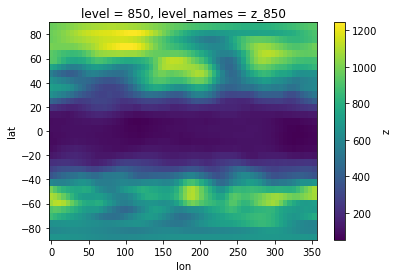

In [166]:
s.isel(level=5).plot()

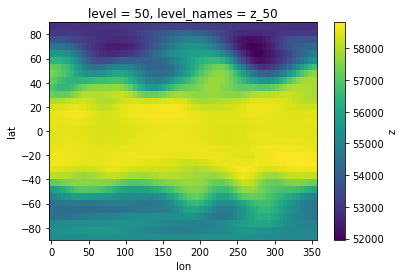

In [159]:
m.isel(level=0).plot()

In [162]:
m.copy()

<xarray.DataArray 'z' (lat: 32, lon: 64, level: 38)>
array([[[55223.33427834, 59017.17627451, 60412.56273916, ...,
         29125.04719422, 42713.25935767, 49871.88606387],
        [55232.86472616, 59029.99419045, 60423.63313138, ...,
         29128.13671433, 42717.1540438 , 49878.79988244],
        [55244.58068599, 59045.66853675, 60437.05173788, ...,
         29132.00294557, 42721.95952903, 49887.22829468],
        ...,
        [55167.42955796, 58945.43800821, 60361.90993702, ...,
         29098.59545731, 42686.06988491, 49827.78938182],
        [55173.61072026, 58952.96100725, 60364.32517538, ...,
         29103.77015724, 42690.3053343 , 49833.29962485],
        [55179.88771026, 58960.78120516, 60368.21673709, ...,
         29108.03422834, 42694.09986113, 49838.70440431]],

       [[55246.00958626, 59023.61497529, 60445.77279974, ...,
         29076.47102076, 42700.57730518, 49887.31528884],
        [55276.53877352, 59065.81811025, 60483.61240434, ...,
         29088.21464577, 42715.20581839, 49908.85419967],
        [55315.84485611, 59119.347726  , 60530.64389349, ...,
         29103.90440837, 42734.38442394, 49936.75474686],
        ...,
        [55116.2465895 , 58858.22677924, 60340.50593909, ...,
         28992.59871886, 42614.28950866, 49782.57751925],
        [55124.2877845 , 58866.93881288, 60331.91764987, ...,
         29010.1000355 , 42627.36272799, 49792.16191093],
        [55135.04061454, 58879.4360227 , 60332.72257653, ...,
         29022.66439612, 42637.91433075, 49802.31093871]],

       [[55126.00055804, 58900.18486926, 60198.60682398, ...,
         29110.77268306, 42652.08817159, 49787.70228894],
        [55159.91648896, 58944.03032824, 60233.35993304, ...,
         29121.81050284, 42663.59553925, 49809.87722744],
        [55199.6742616 , 58995.5961366 , 60276.49968112, ...,
         29133.85948758, 42677.1875734 , 49835.8141286 ],
        ...,
        [54983.64638134, 58726.2713253 , 60239.33105469, ...,
         28921.38631777, 42513.08778342, 49658.1623892 ],
        [54980.62568833, 58718.53383541, 60179.35070552, ...,
         28960.63352716, 42533.48214961, 49664.46739501],
        [54995.30456106, 58731.38083633, 60141.24230708, ...,
         29002.4847274 , 42563.05544193, 49684.71488019]],

       ...,

       [[53776.69483063, 57477.42203089, 59110.9428412 , ...,
         27650.43051232, 41302.38007804, 48467.24607519],
        [53746.573941  , 57449.98481472, 59082.89827806, ...,
         27619.43760538, 41268.16665323, 48434.17318962],
        [53695.04577764, 57399.39606463, 59030.09733737, ...,
         27576.89984758, 41218.11453019, 48382.30958978],
        ...,
        [53794.59028125, 57524.50896276, 59112.35070552, ...,
         27775.67349257, 41346.84385346, 48485.6782386 ],
        [53777.44512527, 57499.26619039, 59126.64178093, ...,
         27742.82878364, 41332.98622363, 48472.15596043],
        [53752.51408061, 57465.56653125, 59124.83027742, ...,
         27708.16940054, 41312.81886562, 48451.92137289]],

       [[53137.14327875, 56877.05223921, 58576.6246014 , ...,
         27260.25887659, 40725.89461216, 47831.92119122],
        [53132.78586183, 56873.09740519, 58573.67259247, ...,
         27243.62372937, 40715.56606513, 47826.15490453],
        [53127.30009373, 56869.95985139, 58573.87364477, ...,
         27221.56638401, 40701.15715855, 47817.58297076],
        ...,
        [53154.12501711, 56919.7831482 , 58626.20625399, ...,
         27328.02823283, 40739.38722844, 47836.08827266],
        [53149.29364122, 56910.61124068, 58624.46181441, ...,
         27318.83589972, 40737.50787616, 47833.87346217],
        [53142.61347285, 56898.38260908, 58615.94140625, ...,
         27309.87457065, 40734.92027312, 47830.61494138]],

       [[52923.78778775, 56757.55819591, 58581.85554847, ...,
         27023.35417512, 40429.94928553, 47556.70719027],
        [52926.34230331, 56762.79638494, 58589.03404018, ...,
         27020.80976983, 40428.00867405, 47556.10841191],
        [52929.7514